In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.feature_selection as feat_select
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare
import explore

In [26]:
#select seaborn color pallete
sns.set_palette('spring')
pal = sns.set_palette('spring')
print(sns.color_palette().as_hex())

['#ff24db', '#ff49b6', '#ff6d92', '#ff926d', '#ffb649', '#ffdb24']


## Project Overview & Goals:
- Use classification methodologies to create a supervised machine learning model that accurately predicts churn.
- Explore data to gain insight and provide recommendations related to drivers of churn.
- My initial hypotheses are that contract type and payment type are drivers of churn.

## Executive Summary

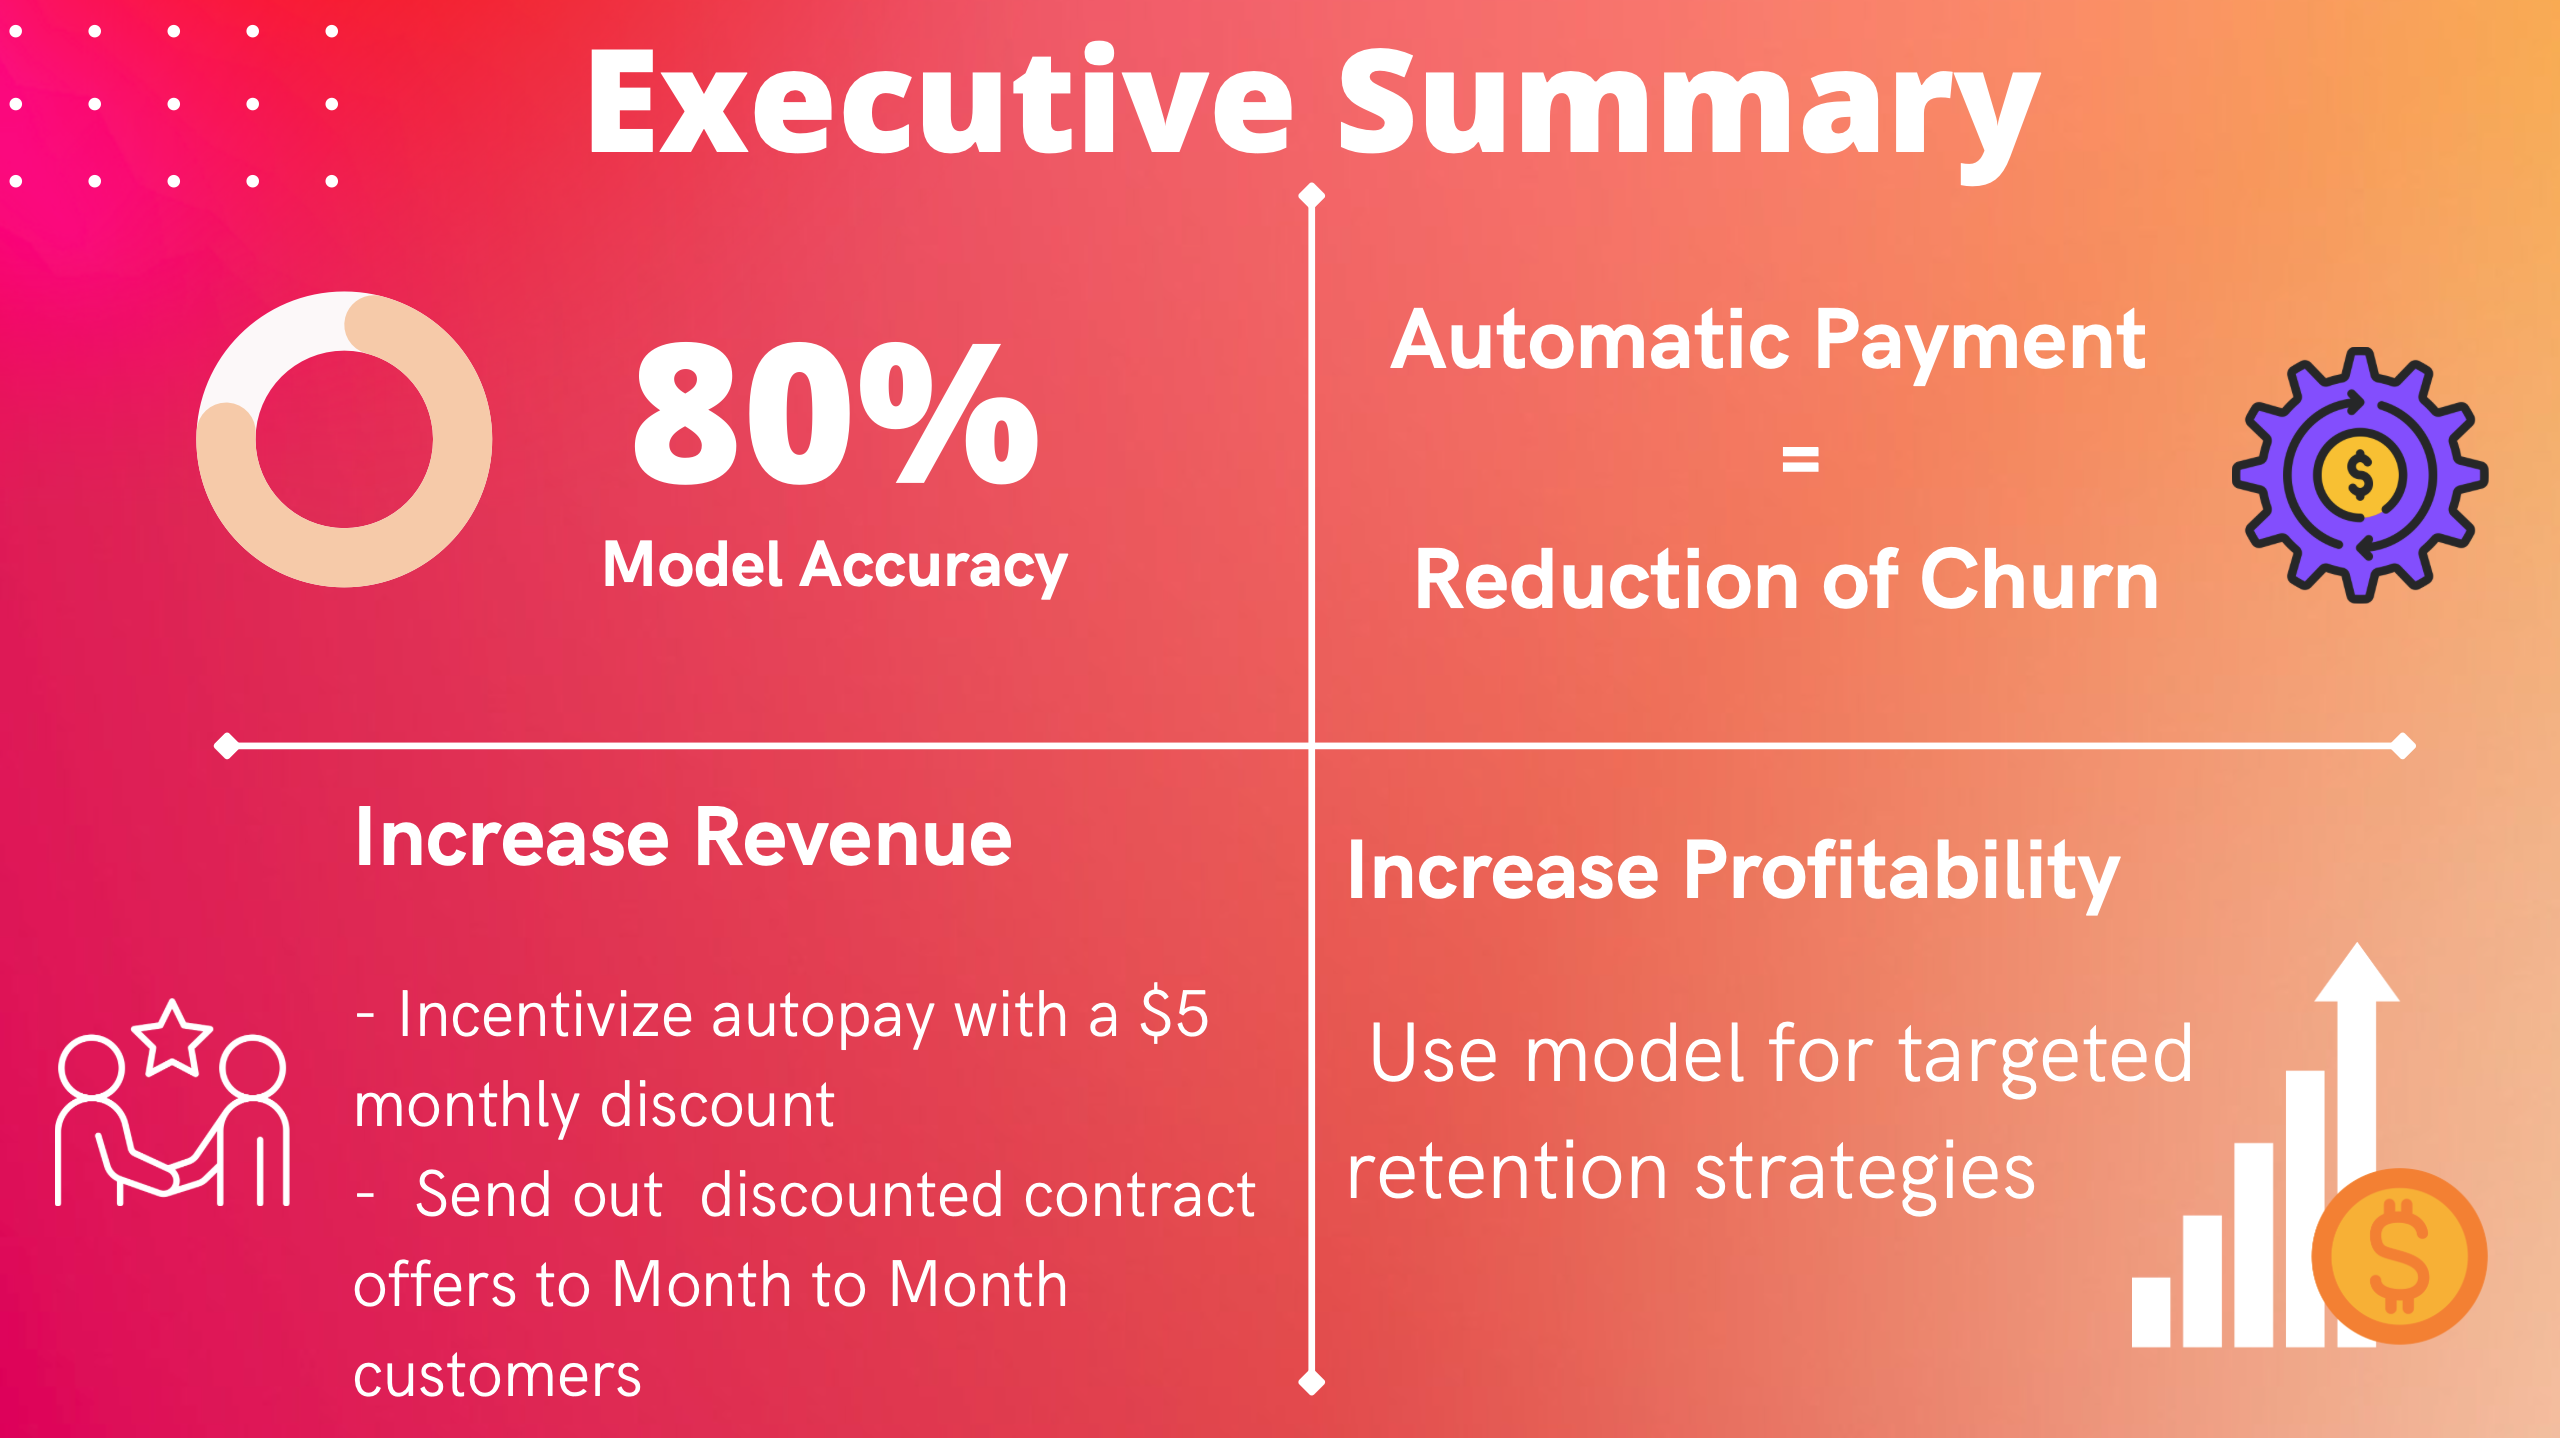

## Recommendations:
 - Put the model into production and begin targeting the customers flagged to churn with targeted marketing.
    - From the data we can see a correlation between month to month customers and churn:
        - Send out offers to month to month customers offering a discounted contract rate.
 - With the correlation of autopay to churn, I would recommend providing an incentive to sign up for autopay.
    - A small $5 dollar monthly discount would be a nice way to incentivize this.

# Plan

- [x] Create project goals.
- [x] Task out Data Science Pipeline workflow in Trello to provide transparency of progress and workflow to key stakeholders.
- [x] Create Readme file to explain project contents, plan, goals, and workflow.
- [x] Create helper fucntion files for the acquire, prepare, and explore phases of the pipeline.
- [x] Acquire, Prepare, and clean data.
- [x] Explore data to find key insights and recommendations
- [x] Validate and test hypothesis using statistical testing
- [x] Train 3 classificiation models, and choose best preforming model for production
- [x] Provide final thoughts and conclusions and recommendations for next steps

To view my complete Data Science Pipeline Project Plan check out my Trello board https://trello.com/b/ueVajFPq/data-science-pipeline

# Step One: Acquire

In [27]:
# Acquire telco churn data from Codeup Database
telco = acquire.new_telco_data()
telco.head()

,customer_id,churn,dependents,device_protection,gender,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,...,streaming_tv,streaming_movies,tech_support,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0016-QLJIS,No,Yes,Yes,Female,90.45,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,5957.9,1,DSL,3,Two year,2,Mailed check
1,0017-DINOC,No,No,No,Male,45.20,No phone service,No,No,No,...,Yes,No,Yes,2460.55,1,DSL,3,Two year,4,Credit card (automatic)
2,0019-GFNTW,No,No,Yes,Female,45.05,No phone service,No,No,No,...,No,No,Yes,2560.1,1,DSL,3,Two year,3,Bank transfer (automatic)
3,0056-EPFBG,No,Yes,Yes,Male,39.40,No phone service,Yes,Yes,No,...,No,No,Yes,825.4,1,DSL,3,Two year,4,Credit card (automatic)
4,0078-XZMHT,No,No,Yes,Male,85.15,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,6316.2,1,DSL,3,Two year,3,Bank transfer (automatic)


In [28]:
#create CSV
acquire.get_telco_data()

,customer_id,churn,dependents,device_protection,gender,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,...,streaming_tv,streaming_movies,tech_support,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0016-QLJIS,No,Yes,Yes,Female,90.45,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,5957.9,1,DSL,3,Two year,2,Mailed check
1,0017-DINOC,No,No,No,Male,45.20,No phone service,No,No,No,...,Yes,No,Yes,2460.55,1,DSL,3,Two year,4,Credit card (automatic)
2,0019-GFNTW,No,No,Yes,Female,45.05,No phone service,No,No,No,...,No,No,Yes,2560.1,1,DSL,3,Two year,3,Bank transfer (automatic)
3,0056-EPFBG,No,Yes,Yes,Male,39.40,No phone service,Yes,Yes,No,...,No,No,Yes,825.4,1,DSL,3,Two year,4,Credit card (automatic)
4,0078-XZMHT,No,No,Yes,Male,85.15,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,6316.2,1,DSL,3,Two year,3,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,No,Yes,No internet service,Female,20.05,No,No,Yes,Yes,...,No internet service,No internet service,No internet service,20.05,3,None,1,Month-to-month,2,Mailed check
7039,9967-ATRFS,No,No,No internet service,Female,19.90,No,No,No,Yes,...,No internet service,No internet service,No internet service,367.55,3,None,1,Month-to-month,2,Mailed check
7040,9970-QBCDA,No,No,No internet service,Female,19.70,No,No,No,Yes,...,No internet service,No internet service,No internet service,129.55,3,None,1,Month-to-month,4,Credit card (automatic)
7041,9975-SKRNR,No,No,No internet service,Male,18.90,No,No,No,Yes,...,No internet service,No internet service,No internet service,18.9,3,None,1,Month-to-month,2,Mailed check


### Complete initial data summarizations and insights

In [29]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   churn                     7043 non-null   object 
 2   dependents                7043 non-null   object 
 3   device_protection         7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   monthly_charges           7043 non-null   float64
 6   multiple_lines            7043 non-null   object 
 7   paperless_billing         7043 non-null   object 
 8   partner                   7043 non-null   object 
 9   phone_service             7043 non-null   object 
 10  tenure                    7043 non-null   int64  
 11  online_backup             7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  senior_citizen            7043 non-null   int64  
 14  streamin

In [30]:
telco.columns

Index(['customer_id', 'churn', 'dependents', 'device_protection', 'gender',
       'monthly_charges', 'multiple_lines', 'paperless_billing', 'partner',
       'phone_service', 'tenure', 'online_backup', 'online_security',
       'senior_citizen', 'streaming_tv', 'streaming_movies', 'tech_support',
       'total_charges', 'internet_service_type_id', 'internet_service_type',
       'contract_type_id', 'contract_type', 'payment_type_id', 'payment_type'],
      dtype='object')

In [31]:
telco.describe()

,monthly_charges,tenure,senior_citizen,internet_service_type_id,contract_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,32.371149,0.162147,1.872923,1.690473,2.315633
std,30.090047,24.559481,0.368612,0.737796,0.833755,1.148907
min,18.250000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,35.500000,9.000000,0.000000,1.000000,1.000000,1.000000
50%,70.350000,29.000000,0.000000,2.000000,1.000000,2.000000
75%,89.850000,55.000000,0.000000,2.000000,2.000000,3.000000
max,118.750000,72.000000,1.000000,3.000000,3.000000,4.000000


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'internet_service_type_id'}>],
       [<AxesSubplot:title={'center':'contract_type_id'}>,
        <AxesSubplot:title={'center':'payment_type_id'}>]], dtype=object)

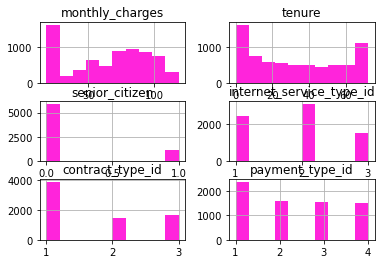

In [32]:
telco.hist()

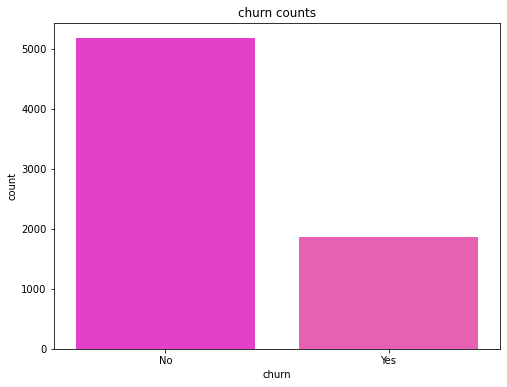

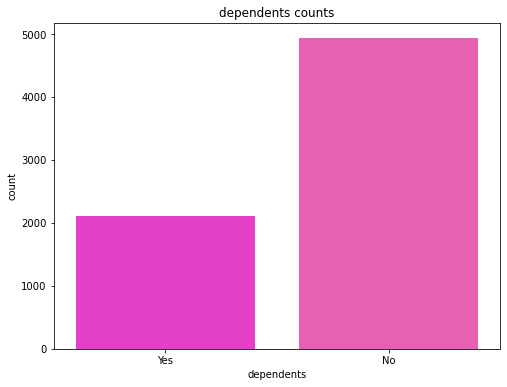

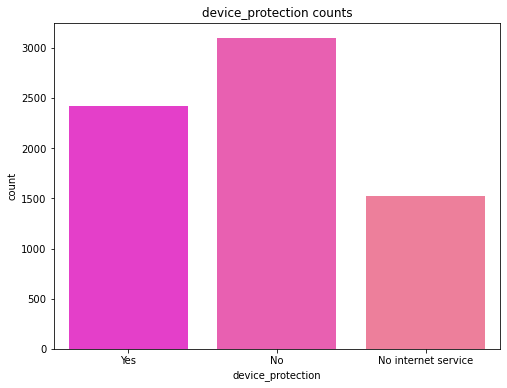

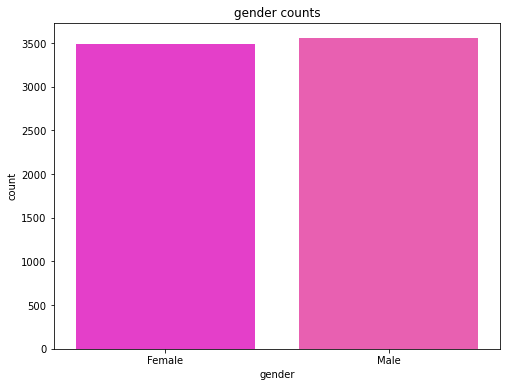

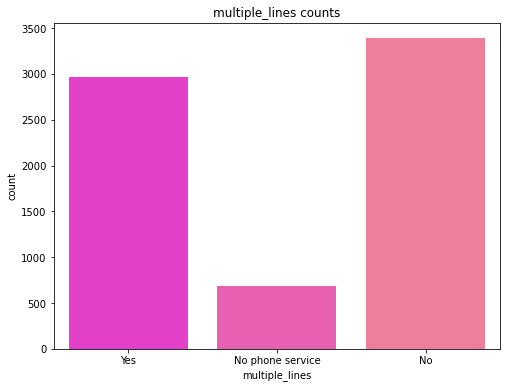

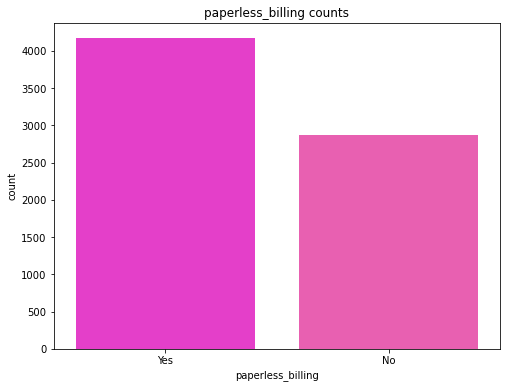

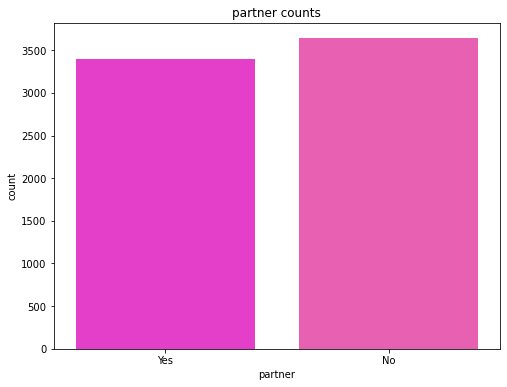

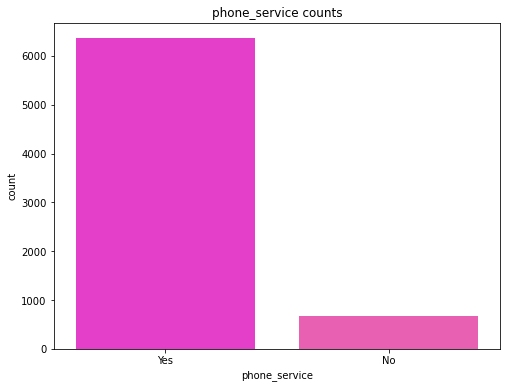

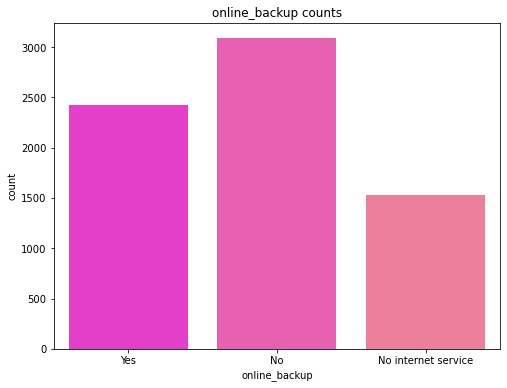

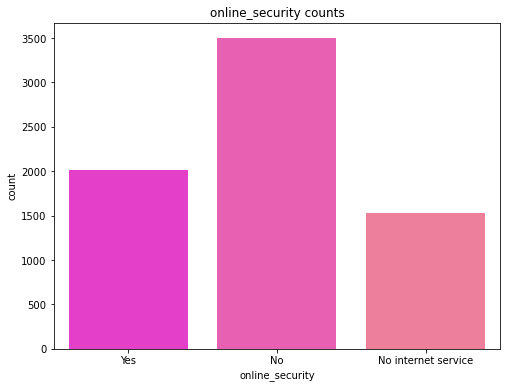

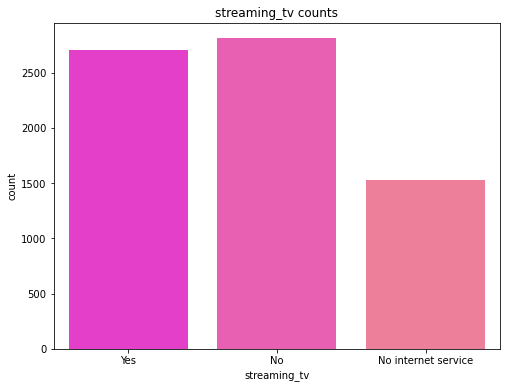

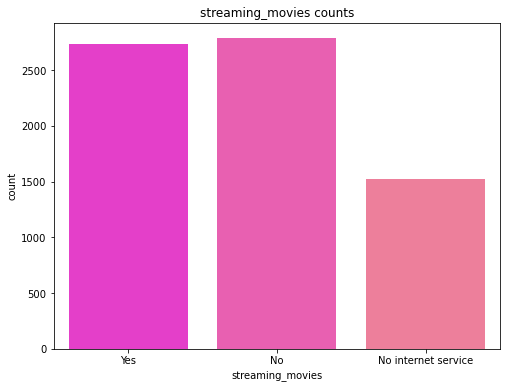

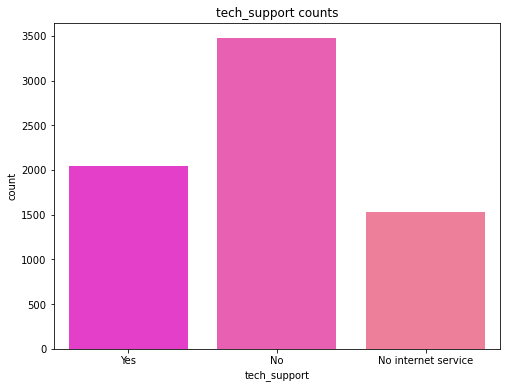

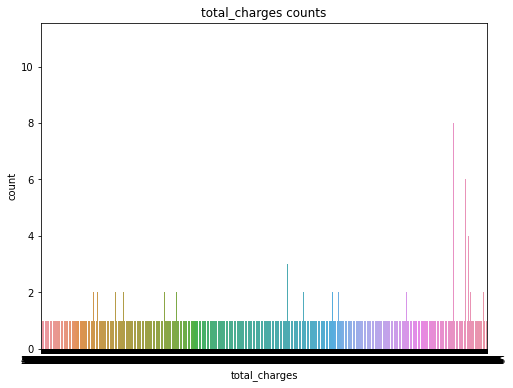

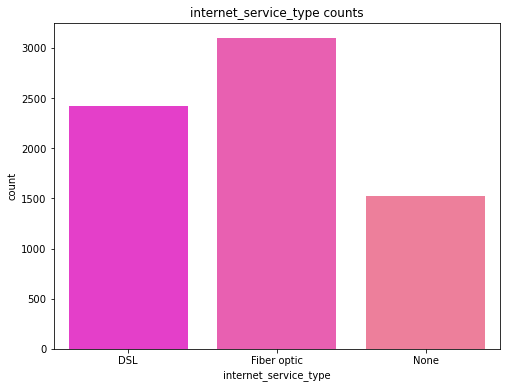

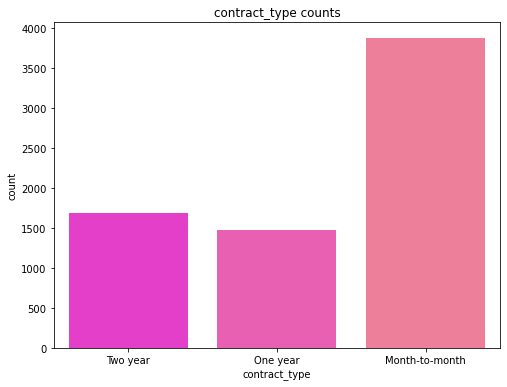

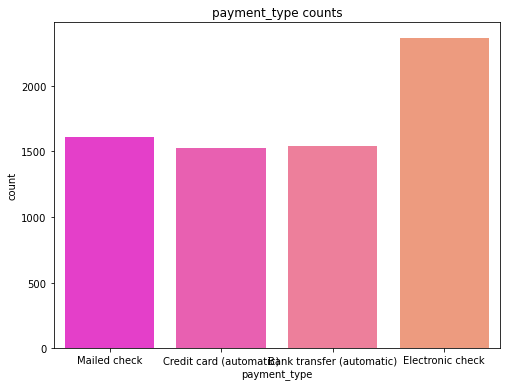

In [33]:
explore.plot_counts(telco)

#### Acquire Takeaways:
- Tenure of all null values is zero.  This means they are in their first month of service.
- Based on this information, I will replace the nulls with zero.
- The most popular service is phone service
- Gender appears to not be correlated with churn at all and can likely be dropped.  Statistical testing should be done to verify. 

# Step two: Prepare

Checklist for Prepare:
Create Prepare.py to store functions that are needed to prepare your data; make sure your module contains the necessary imports to run your code. Your final function should do the following:
   - [x] Handle Missing Values
   - [x] Handle erroneous data and/or outliers you wish to address.
   - [x] Encode variables as needed.
   - [x] Create any new features: add automatic_payment column
   - [x] Drop columns before and after explore: gender, customer_id, 
   - [x] Split your data into train/validate/test.
   - [x] Create encoded df for splitting and non-encoded df for exploring

In [99]:
#Use function from prepare to pull in data cleaned and prepped for explore
explore_df = prepare.prep_telco_explore(telco)

In [100]:
train, validate, test = prepare.train_validate_test_split(explore_df, target='churn', seed=123)

# Explore

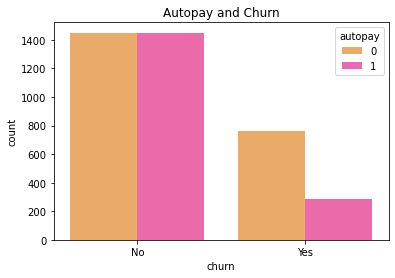

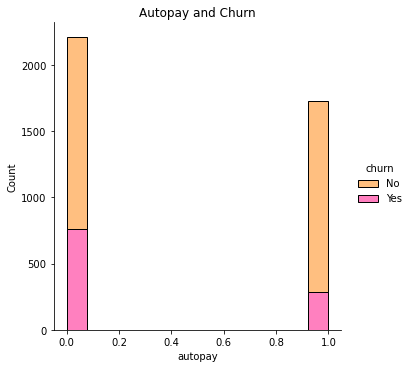

In [101]:
plt.subplots()
sns.countplot(data=train, hue='autopay' , x = 'churn', palette=('spring_r')) 
plt.title('Autopay and Churn')
plt.show()


sns.displot(train, x='autopay', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Autopay and Churn')
plt.show()

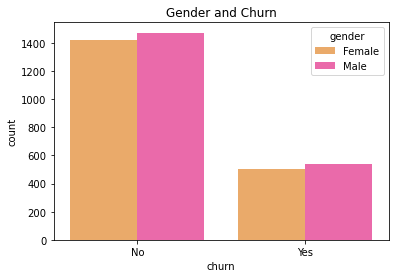

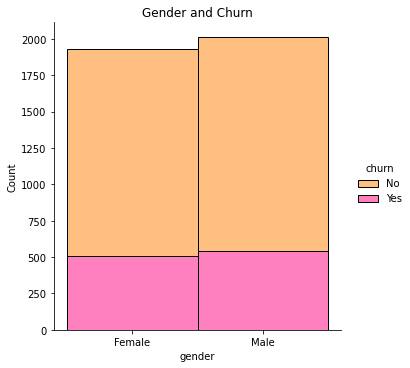

In [102]:
plt.subplots()
sns.countplot(data=train, hue='gender' , x = 'churn', palette=('spring_r')) 
plt.title('Gender and Churn')
plt.show()


sns.displot(train, x='gender', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Gender and Churn')
plt.show()

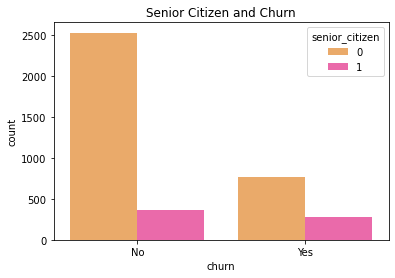

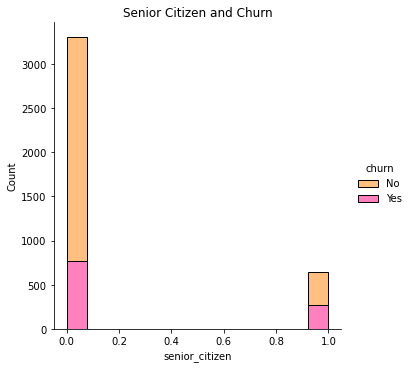

In [103]:
plt.subplots()
sns.countplot(data=train, hue='senior_citizen' , x = 'churn', palette=('spring_r')) 
plt.title('Senior Citizen and Churn')
plt.show()


sns.displot(train, x='senior_citizen', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Senior Citizen and Churn')
plt.show()

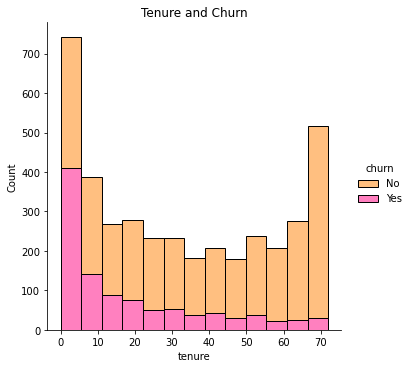

In [104]:
sns.displot(train, x='tenure', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Tenure and Churn')
plt.show()

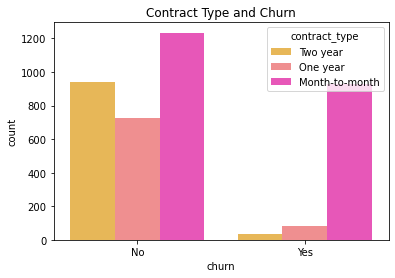

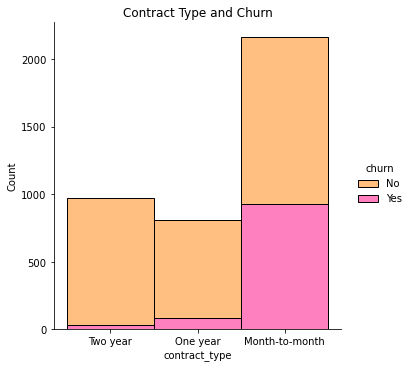

In [108]:
plt.subplots()
sns.countplot(data=train, hue='contract_type' , x = 'churn', palette=('spring_r')) 
plt.title('Contract Type and Churn')
plt.show()


sns.displot(train, x='contract_type', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Contract Type and Churn')
plt.show()

In [110]:
train.columns

Index(['churn', 'dependents', 'device_protection', 'gender', 'monthly_charges',
       'multiple_lines', 'paperless_billing', 'partner', 'phone_service',
       'tenure', 'online_backup', 'online_security', 'senior_citizen',
       'streaming_tv', 'streaming_movies', 'tech_support', 'total_charges',
       'internet_service_type_id', 'internet_service_type', 'contract_type_id',
       'contract_type', 'payment_type_id', 'payment_type', 'autopay'],
      dtype='object')

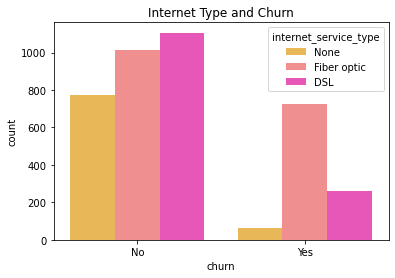

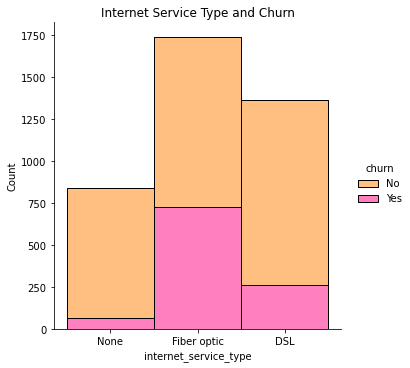

In [112]:
plt.subplots()
sns.countplot(data=train, hue='internet_service_type' , x = 'churn', palette=('spring_r')) 
plt.title('Internet Type and Churn')
plt.show()


sns.displot(train, x='internet_service_type', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Internet Service Type and Churn')
plt.show()

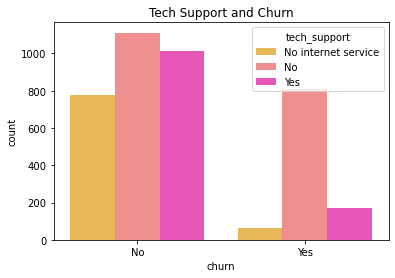

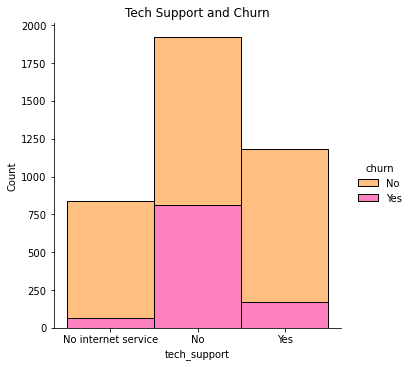

In [111]:
plt.subplots()
sns.countplot(data=train, hue='tech_support' , x = 'churn', palette=('spring_r')) 
plt.title('Tech Support and Churn')
plt.show()


sns.displot(train, x='tech_support', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Tech Support and Churn')
plt.show()

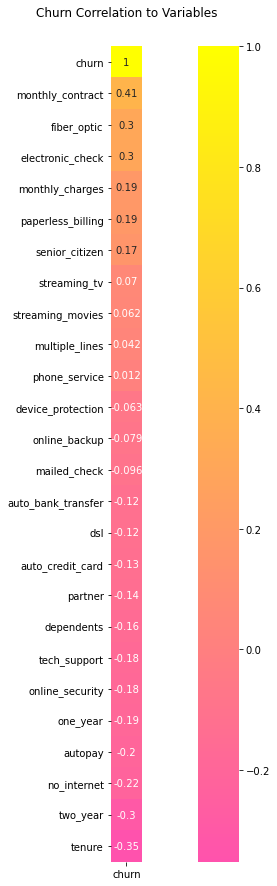

In [216]:
c_heatmap = pd.DataFrame(train.corr()['churn'])
plt.figure(figsize = [20,15])
sns.heatmap(c_heatmap.sort_values(by = 'churn',ascending = False), center = 0, cmap='spring', annot=True, square = True)
plt.title('Churn Correlation to Variables', pad = 30)
plt.show()

### Takeaways:
- The rate of churn for customers on autopay is lower than those not on autopay.
- There does not appear to be any correlation between gender and churn
- Month to Month customers have a significantly higher rate of churn
- There seems to be a higher rate of churn for senior citizens, but they are a small portion of the customer base
- electronic check customers have a high rate of churn
- For internet types, Fiber optics has a high rate of churn
- Customers without tech support have a higher rate of churn
- drop gender as there is very little value/correlation to churn - run stat test to verify

## Statistical Testing

### Autopay and Churn Chi Squared Test

In [113]:
alpha = .5
observed = pd.crosstab(train['autopay'], train['churn'])
observed

churn,No,Yes
autopay,,
0,1450,762
1,1447,284


In [114]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [115]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that autopay is not independent of churn''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churn      No  Yes
autopay           
0        1450  762
1        1447  284
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churn             No         Yes
autopay                         
0        1625.200101  586.799899
1        1271.799899  459.200101
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 161.2517
p value: 0.00000000
degrees of freedom: 1
Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that autopay is not independent of churn


### Gender and Churn - defend dropping column

In [116]:
alpha = .5
gender_observed = pd.crosstab(train['gender'], train['churn'])
gender_observed

churn,No,Yes
gender,,
Female,1424,506
Male,1473,540


In [117]:
chi2, p, degf, expected = stats.chi2_contingency(gender_observed)

In [118]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that gender is not independent of churn''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churn      No  Yes
autopay           
0        1450  762
1        1447  284
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churn            No        Yes
autopay                       
0        1418.00913  511.99087
1        1478.99087  534.00913
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 0.1570
p value: 0.69193985
degrees of freedom: 1
We cannot reject the null hypothesis


### Takeaways:
 - Autopay is NOT independent of churn and is a feature that could add value to to the model
 - Gender is independent of churn and can be removed from data

# Model

In [217]:
# Import data again with function that encodes
train, validate, test = prepare.prep_telco_model(acquire.new_telco_data())
train.head()

,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,online_backup,...,fiber_optic,no_internet,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay
5642,0,1,0,25.60,1,1,1,1,23,0,...,0,1,0,0,1,0,1,0,0,1
3338,0,0,1,100.50,1,1,0,1,27,0,...,1,0,0,1,0,1,0,0,0,1
4273,0,0,0,89.15,0,1,0,1,7,0,...,1,0,1,0,0,0,0,1,0,0
2382,0,0,0,58.60,0,1,1,1,47,1,...,0,0,1,0,0,1,0,0,0,1
2655,0,0,0,99.65,0,1,0,1,41,1,...,1,0,0,0,1,0,1,0,0,1


In [166]:
train.columns

Index(['churn', 'dependents', 'device_protection', 'monthly_charges',
       'multiple_lines', 'paperless_billing', 'partner', 'phone_service',
       'tenure', 'online_backup', 'online_security', 'senior_citizen',
       'streaming_tv', 'streaming_movies', 'tech_support', 'dsl',
       'fiber_optic', 'no_internet', 'monthly_contract', 'one_year',
       'two_year', 'auto_bank_transfer', 'auto_credit_card',
       'electronic_check', 'mailed_check', 'autopay'],
      dtype='object')

In [167]:
validate.head()

,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,online_backup,...,fiber_optic,no_internet,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay
1630,1,0,0,53.85,0,1,0,1,2,1,...,0,0,1,0,0,0,0,0,1,0
5181,1,1,0,71.65,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
4239,0,0,0,75.40,0,1,0,1,23,0,...,1,0,1,0,0,1,0,0,0,1
5814,0,1,0,24.45,1,0,1,1,45,0,...,0,1,0,0,1,0,0,0,1,0
1438,1,0,1,67.95,1,0,1,1,5,0,...,0,0,1,0,0,1,0,0,0,1


### Establish the baseline
 - Take most common value, not churned and add baseline column

In [122]:
# inputs baseline values and then calculates the accuracy compared to the actual churn rates
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.churn).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 73.47%


### Predictions Explained Four Ways:
- True Positive: True Positive. We predicted the customer would stay & they did.
- True Negative: True Negative. We predicted the customer would leave & they did.
- False Positive: False Positive. We predicted the customer would stay & they didn't.
- False Negative: False Negative. We predicted the customer would leave & they didn't.

#### The focus for the models is to optimize recall to maximize the amount of positive cases predict.  A positive case is a customer staying.  By predicting which customers will stay we can focus efforts on those that are predicted to leave.

In [172]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## Random Forest

In [173]:
#Create the object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [174]:
###### fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, random_state=123)

In [175]:
# Evaluate feature importance
print(rf.feature_importances_)

[0.01138298 0.01303012 0.14794434 0.01869573 0.024315   0.01490803
 0.00848061 0.2490783  0.01909532 0.02488085 0.0179813  0.01402347
 0.01390322 0.02846331 0.01394644 0.06283122 0.02889363 0.13643371
 0.01688981 0.04344547 0.0080842  0.00864957 0.04891564 0.00861545
 0.01711229]


In [176]:
#make predictions
y_pred = rf.predict(X_train)

In [177]:
# estimate probability
y_pred_proba = rf.predict_proba(X_train)

### Evaluate the Model

#### Compute Accuracy

In [178]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


#### Create a confusion matrix

In [179]:
print(confusion_matrix(y_train, y_pred))

[[2732  165]
 [ 405  641]]


#### Print Classification Report

In [180]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2897
           1       0.80      0.61      0.69      1046

    accuracy                           0.86      3943
   macro avg       0.83      0.78      0.80      3943
weighted avg       0.85      0.86      0.85      3943



In [189]:
model_metrics(X_train, y_train, rf, data_set = 'train')

train accuracy score: 85.54%
train precision score 79.53%
train recall score: 61.28%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2897
           1       0.80      0.61      0.69      1046

    accuracy                           0.86      3943
   macro avg       0.83      0.78      0.80      3943
weighted avg       0.85      0.86      0.85      3943

-------------------------------

confusion matrix
[[2732  165]
 [ 405  641]]

train model metrics
---------------------------------
True positive rate for the model is 61.28%
False positive rate for the model is  5.70%
True negative rate for the model is 94.30%
False negative rate for the model is 38.72%



In [247]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.80


In [248]:
model_metrics(X_validate, y_validate, rf, data_set = 'validate')

validate accuracy score: 80.31%
validate precision score 66.57%
validate recall score: 51.89%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1242
           1       0.67      0.52      0.58       449

    accuracy                           0.80      1691
   macro avg       0.75      0.71      0.73      1691
weighted avg       0.79      0.80      0.79      1691

-------------------------------

confusion matrix
[[1125  117]
 [ 216  233]]

validate model metrics
---------------------------------
True positive rate for the model is 51.89%
False positive rate for the model is  9.42%
True negative rate for the model is 90.58%
False negative rate for the model is 48.11%



### Takeaways:
- model beat baseline - yay!
- model was great at predicting churn
- with more time I would love to do more with the features
- This is the model that has been selected as the best preforming model


### Decision Tree

In [193]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Print classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.845649,0.641425,0.799138,0.743537,0.791472
recall,0.888851,0.550669,0.799138,0.719760,0.799138
f1-score,0.866712,0.592593,0.799138,0.729652,0.793993
support,2897.000000,1046.000000,0.799138,3943.000000,3943.000000


In [195]:
#print metrics for train
model_metrics(X_train, y_train, tree1, data_set = 'train')

train accuracy score: 79.91%
train precision score 64.14%
train recall score: 55.07%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2897
           1       0.64      0.55      0.59      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.72      0.73      3943
weighted avg       0.79      0.80      0.79      3943

-------------------------------

confusion matrix
[[2575  322]
 [ 470  576]]

train model metrics
---------------------------------
True positive rate for the model is 55.07%
False positive rate for the model is  11.11%
True negative rate for the model is 88.89%
False negative rate for the model is 44.93%



In [196]:
#print metrics for validate
model_metrics(X_validate, y_validate, tree1, data_set = 'validate')

validate accuracy score: 79.48%
validate precision score 63.42%
validate recall score: 53.67%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1242
           1       0.63      0.54      0.58       449

    accuracy                           0.79      1691
   macro avg       0.74      0.71      0.72      1691
weighted avg       0.79      0.79      0.79      1691

-------------------------------

confusion matrix
[[1103  139]
 [ 208  241]]

validate model metrics
---------------------------------
True positive rate for the model is 53.67%
False positive rate for the model is  11.19%
True negative rate for the model is 88.81%
False negative rate for the model is 46.33%



### Takeaways for Decision Tree Model
- The model beat baseline.. yay!
- This model also did well predicting churn, but didn't do as well predicting when a customer would stay
- With more time I would adjust more of the parameters to fine tune this model further


## KNN

In [197]:
#create object:
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')

In [198]:
#fit the model to training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [199]:
#make predictions
y_pred = knn.predict(X_train)

In [200]:
#estimate probability
y_pred_proba = knn.predict_proba(X_train)

### Evaluate the model

In [201]:
#view metrics
#print metrics for train
model_metrics(X_train, y_train, knn, data_set = 'train')

train accuracy score: 81.54%
train precision score 73.31%
train recall score: 47.80%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2897
           1       0.73      0.48      0.58      1046

    accuracy                           0.82      3943
   macro avg       0.78      0.71      0.73      3943
weighted avg       0.81      0.82      0.80      3943

-------------------------------

confusion matrix
[[2715  182]
 [ 546  500]]

train model metrics
---------------------------------
True positive rate for the model is 47.80%
False positive rate for the model is  6.28%
True negative rate for the model is 93.72%
False negative rate for the model is 52.20%



In [202]:
#print metrics for validate
model_metrics(X_validate, y_validate, knn, data_set = 'validate')

validate accuracy score: 79.48%
validate precision score 67.59%
validate recall score: 43.65%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1242
           1       0.68      0.44      0.53       449

    accuracy                           0.79      1691
   macro avg       0.75      0.68      0.70      1691
weighted avg       0.78      0.79      0.78      1691

-------------------------------

confusion matrix
[[1148   94]
 [ 253  196]]

validate model metrics
---------------------------------
True positive rate for the model is 43.65%
False positive rate for the model is  7.57%
True negative rate for the model is 92.43%
False negative rate for the model is 56.35%



### Takeaways:
- this model beat baseline accuracy.. yay!
- this model had the lowest true positive rate

## Test Model: the grand finale!

### The Random Forest Model was selected as the best model because it had the most well rounded preformance metrics.
Let's see how it does on the test data!



In [218]:
#Fingers crossed!
model_metrics(X_test, y_test, rf, data_set = 'test')

test accuracy score: 80.84%
test precision score 66.77%
test recall score: 55.35%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

-------------------------------

confusion matrix
[[932 103]
 [167 207]]

test model metrics
---------------------------------
True positive rate for the model is 55.35%
False positive rate for the model is  9.95%
True negative rate for the model is 90.05%
False negative rate for the model is 44.65%



## Final Model Conclusions:
- The Random Forest Model preformed best and was the most well rounded model for the job
- Accuracy on validate was 80.31%
- Recall was 66.47%
- Accuracy on Test 80.84% accuracy which is slightly higher than validate showing the model will preform well on unseen data!!!
- Recall stayed pretty high relative to other models as well 55.35%

## Recommendations:
 - Put the model into production and begin targeting the customers flagged to churn with targeted marketing.
    - From the data we can see a correlation between month to month customers and churn:
        - Send out offers to month to month customers offering a discounted contract rate.
 - With the correlation of autopay to churn, I would recommend providing an incentive to sign up for autopay.
    - A small $5 dollar monthly discount would be a nice way to incentivize this.

### I would also like more time with the model to dive down into feature selection and engineering as it may enhance model preformance:
 - Splitting up the data further and running tests on only the Month to Month customers
 - Looking at a subset of data for those customers that have only been with us for less than a year as they less tenure, the higher the churn rate.
 - Looking at the reverse side of this would have value as well.
 - Dive into phone service as a subset of the data since it is our most popular service.

### Create Predictions CSV file

In [225]:
#my random forest's probabilities
probability_test = rf.predict_proba(X_test)

In [226]:
#create df
probability_df = pd.DataFrame(probability_test, columns=rf.classes_.tolist())
probability_df.head()

,0,1
0,0.947886,0.052114
1,0.669843,0.330157
2,0.687142,0.312858
3,0.663640,0.336360
4,0.553384,0.446616


In [227]:
#reset the index
reset_test = test.reset_index()
reset_test.head()

,index,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,...,fiber_optic,no_internet,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay
0,2789,0,0,1,113.40,1,0,0,1,72,...,1,0,0,0,1,1,0,0,0,1
1,1233,0,0,0,45.90,0,1,1,1,11,...,0,0,1,0,0,1,0,0,0,1
2,6784,1,0,0,20.20,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,0
3,3177,0,0,1,109.60,1,1,1,1,71,...,1,0,0,1,0,0,0,1,0,0
4,1740,1,0,0,44.65,0,0,0,1,2,...,0,0,1,0,0,0,0,0,1,0


In [229]:
#Combine 
test_probability_df = pd.concat([reset_test, probability_df], axis=1)
test_probability_df.head()

,index,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,...,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay,0,1
0,2789,0,0,1,113.40,1,0,0,1,72,...,0,0,1,1,0,0,0,1,0.947886,0.052114
1,1233,0,0,0,45.90,0,1,1,1,11,...,1,0,0,1,0,0,0,1,0.669843,0.330157
2,6784,1,0,0,20.20,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0.687142,0.312858
3,3177,0,0,1,109.60,1,1,1,1,71,...,0,1,0,0,0,1,0,0,0.663640,0.336360
4,1740,1,0,0,44.65,0,0,0,1,2,...,1,0,0,0,0,0,1,0,0.553384,0.446616


In [233]:
predicted_test = rf.predict(X_test)

In [234]:
#adding my predicted result column
test_probability_df['predicted'] = predicted_test
test_probability_df.head()

,index,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,...,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay,0,1,predicted
0,2789,0,0,1,113.40,1,0,0,1,72,...,0,1,1,0,0,0,1,0.947886,0.052114,0
1,1233,0,0,0,45.90,0,1,1,1,11,...,0,0,1,0,0,0,1,0.669843,0.330157,0
2,6784,1,0,0,20.20,0,0,0,1,1,...,0,0,0,0,0,1,0,0.687142,0.312858,0
3,3177,0,0,1,109.60,1,1,1,1,71,...,1,0,0,0,1,0,0,0.663640,0.336360,0
4,1740,1,0,0,44.65,0,0,0,1,2,...,0,0,0,0,0,1,0,0.553384,0.446616,0


In [245]:
#only keeping the relevant columns
telco_prediction = test_probability_df[[0,1, 'predicted']]

In [246]:
telco_prediction.to_csv('telco_predictions.csv')